# Stocks

In [133]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import ig
import datetime as dt
import calendar

In [2]:
plt.style.use('seaborn')
graph_size=(14,10)

## API Setup

In [58]:
details = ig.get_api('prod')
api = ig.APIHandler(details['url'], details['api_key'], details['user_name'], details['password'])
del details

In [ ]:
api.debug_level = 0

## Price Analysis

### Historic Price Retrieval

In [4]:
# api.markets(93334)
# api.debug_level = 1
prices = api.prices('IX.D.FTSE.DAILY.IP', resolution='DAY',
                    from_date=dt.datetime(2020, 1, 1), to_date=dt.datetime.now(),
                    show_remaining_requests=True)

Allowance Details
remainingAllowance: 9725
totalAllowance: 10000
allowanceExpiry: 2 days, 18:16:55


In [15]:
vodafone = api.prices('KA.D.VOD.DAILY.IP', resolution='DAY',
                    from_date=dt.datetime(2020, 1, 1), to_date=dt.datetime.now(),
                    show_remaining_requests=True)

Allowance Details
remainingAllowance: 9562
totalAllowance: 10000
allowanceExpiry: 2 days, 18:12:57


In [16]:
vodafone

,time,volume,open_bid,open_ask,close_bid,close_ask,high_bid,high_ask,low_bid,low_ask
0,2020-01-02,6042774,145.85,146.55,147.27,147.63,148.41,148.77,145.85,146.55
1,2020-01-03,4433623,146.57,147.55,147.77,148.17,148.53,148.87,146.57,147.09
2,2020-01-06,5177717,146.87,147.77,146.57,146.95,147.39,147.77,145.59,145.95
3,2020-01-07,7428486,147.27,147.85,146.55,146.89,149.07,149.41,146.11,146.47
4,2020-01-08,4681044,146.05,146.65,147.07,147.47,147.43,147.77,145.29,145.67
...,...,...,...,...,...,...,...,...,...,...
158,2020-08-14,29956957,120.12,121.18,118.82,119.10,120.40,121.18,117.10,117.36
159,2020-08-17,23399046,118.26,119.16,117.86,118.16,119.06,119.46,116.84,117.10
160,2020-08-18,33575304,116.40,117.06,117.06,117.36,119.02,119.28,116.00,116.38
161,2020-08-19,26927314,116.78,117.32,118.08,118.38,118.60,118.88,116.16,116.52


In [39]:
api.markets(125257)

,id,name
0,265525,Daily FTSE Options
1,303124,WEEKLY
2,170020663,AUG
3,143093189,SEP
4,182163442,OCT
5,159198657,DEC
6,176960455,MAR


### Data Manipulation

In [ ]:
price_columns = [column for column in prices.columns if 'Price' in column]

for column in price_columns:
    new_columns = prices[column].apply(pd.Series)
    new_columns.columns = [column.replace('Price', '') + '_' + c for c in new_columns.columns]
    prices = prices.join(new_columns).drop(columns=column, axis=1)

In [ ]:
prices = (prices.rename(columns={'snapshotTime': 'time', 'lastTradedVolume': 'volume'})
          .dropna(axis=1)
         )
prices.time = pd.to_datetime(prices.time)
prices

### Analysis

In [17]:
prices.to_pickle('prices.pkl')

In [18]:
prices['buy_profit'] = prices.close_bid - prices.open_ask
prices['buy_stop'] = prices.low_bid - prices.open_ask
prices['buy_limit'] = prices.high_bid - prices.open_ask
prices['sell_profit'] = -(prices.close_ask - prices.open_bid)
prices['sell_stop'] = prices.high_ask - prices.open_bid
prices['sell_limit'] = prices.low_ask - prices.open_bid
prices

,time,volume,open_bid,open_ask,close_bid,close_ask,high_bid,high_ask,low_bid,low_ask,buy_profit,buy_stop,buy_limit,sell_profit,sell_stop,sell_limit
0,2020-01-01,0,7557.8,7561.8,7554.9,7558.9,7566.0,7570.0,7552.0,7556.0,-6.9,-9.8,4.2,-1.1,12.2,-1.8
1,2020-01-02,91282,7555.3,7559.3,7623.1,7627.1,7634.6,7638.6,7546.3,7549.3,63.8,-13.0,75.3,-71.8,83.3,-6.0
2,2020-01-03,80558,7622.9,7626.9,7599.2,7603.2,7632.8,7635.8,7548.8,7549.8,-27.7,-78.1,5.9,19.7,12.9,-73.1
3,2020-01-05,0,7573.7,7577.7,7590.9,7594.9,7593.2,7597.2,7565.1,7569.1,13.2,-12.6,15.5,-21.2,23.5,-4.6
4,2020-01-06,80460,7591.3,7595.3,7584.6,7588.6,7598.0,7599.0,7525.8,7526.8,-10.7,-69.5,2.7,2.7,7.7,-64.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,2020-08-16,0,6083.0,6087.0,6085.3,6089.3,6086.7,6090.7,6080.4,6084.4,-1.7,-6.6,-0.3,-6.3,7.7,1.4
195,2020-08-17,62223,6085.5,6089.5,6121.6,6125.6,6140.4,6141.4,6057.4,6058.4,32.1,-32.1,50.9,-40.1,55.9,-27.1
196,2020-08-18,73283,6120.9,6124.9,6078.7,6082.7,6163.9,6164.9,6057.6,6058.6,-46.2,-67.3,39.0,38.2,44.0,-62.3
197,2020-08-19,66482,6079.1,6083.1,6075.1,6079.1,6115.1,6117.1,6042.9,6043.9,-8.0,-40.2,32.0,-0.0,38.0,-35.2


In [75]:
mondays = prices[(prices.time.dt.weekday == 0)].copy()
fridays = prices[(prices.time.dt.weekday == 4)].copy()

#### Maximum Profit

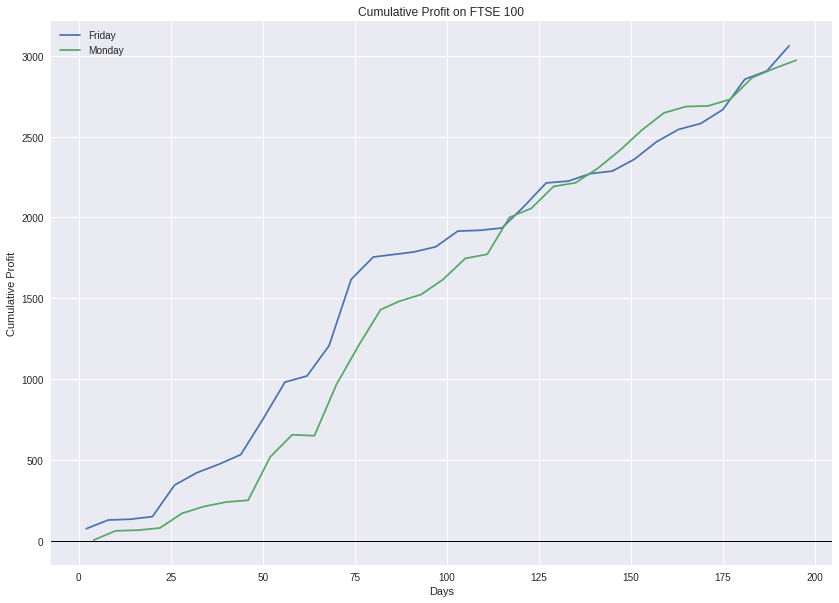

In [20]:
ax = (-fridays.sell_limit).cumsum().plot(figsize=graph_size, legend=True, title='Cumulative Profit on FTSE 100')
ax = mondays.buy_limit.cumsum().plot(figsize=graph_size, legend=True)
ax.set_xlabel('Days')
ax.set_ylabel('Cumulative Profit')
ax.axhline(y=0, color='k', linewidth=1)
ax.legend(['Friday', 'Monday'])

#### Full-day Profit
- buy FTSE 100 on Monday 00:00 and sell Monday 23:59 (green line)
- sell FTSE 100 on Friday 00:00 and buy Friday 23:59 (buy line)

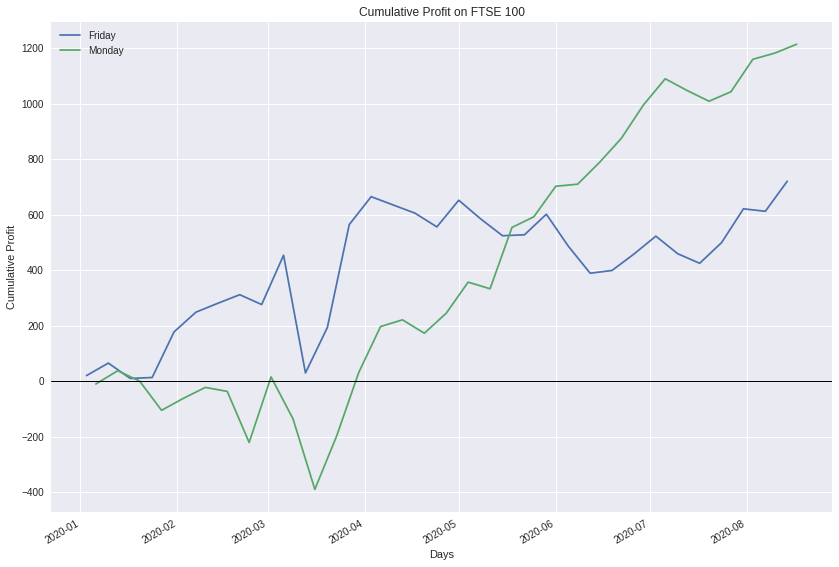

In [21]:
ax = fridays.set_index('time').sell_profit.cumsum().plot(figsize=graph_size, legend=True, title='Cumulative Profit on FTSE 100')
ax = mondays.set_index('time').buy_profit.cumsum().plot(figsize=graph_size, legend=True)
ax.set_xlabel('Days')
ax.set_ylabel('Cumulative Profit')
ax.axhline(y=0, color='k', linewidth=1)
ax.legend(['Friday', 'Monday'])

#### Thresholds


In [170]:
def get_trades(df, stop_quantile=0.8, limit_quantile=0.8):
    quantiles = {'stop': stop_quantile, 'limit': 1 - limit_quantile}
    day = {'buy': 0, 'sell': 4}
    trade_df = pd.DataFrame(columns=['day', 'direction', 'stop', 'limit'])
    
    for direction in ['buy', 'sell']:
        day_df = df[df.time.dt.weekday == day[direction]]
        trade = {'day': calendar.day_name[day[direction]],
                 'direction': direction,
                 'stop': day_df[direction + '_' + 'stop'].apply(np.abs).quantile(stop_quantile),
                 'limit': day_df[direction + '_' + 'limit'].apply(np.abs).quantile(1 - limit_quantile)
                }
        trade_df = trade_df.append(trade, ignore_index=True)
    
    trade_df['risk_reward_ratio'] = trade_df.limit / trade_df.stop
    trade_df['expected_value'] = limit_quantile * trade_df.limit - (1 - stop_quantile) * trade_df.stop
    print(trade_df)

In [182]:
get_trades(prices, stop_quantile=0.7, limit_quantile=0.7)

      day direction   stop  limit  risk_reward_ratio  expected_value
0  Monday       buy  69.70  40.08           0.575036           7.146
1  Friday      sell  65.99  40.60           0.615245           8.623


In [32]:
print('Monday Trades:')
mondays[[c for c in mondays.columns if 'buy' in c]].describe()

Monday Trades:


,buy_profit,buy_stop,buy_limit
count,33.000000,33.000000,33.000000
mean,36.784848,-74.584848,90.063636
std,112.893781,113.933591,83.748066
min,-254.600000,-533.200000,-6.600000
25%,-23.900000,-84.300000,27.300000
50%,38.600000,-30.500000,56.800000
75%,109.900000,-15.500000,129.600000
max,236.100000,-4.400000,317.100000


In [40]:
fridays[[c for c in fridays.columns if 'sell' in c]].describe()

,sell_profit,sell_stop,sell_limit
count,32.000000,32.000000,32.000000
mean,22.506250,63.618750,-95.643750
std,127.933541,87.741679,87.475707
min,-424.100000,4.300000,-410.100000
25%,-50.950000,15.600000,-140.050000
50%,25.300000,31.100000,-73.250000
75%,79.900000,69.750000,-35.350000
max,370.900000,446.800000,-4.600000


In [60]:
pos = api.positions()

In [62]:
api.positions()[['epic', 'contractSize', 'level', 'stopLevel', 'limitLevel', 'profit']]

,epic,contractSize,level,stopLevel,limitLevel,profit
0,IX.D.FTSE.DAILY.IP,-0.5,6022.9,6082.9,5980,-2.5


#### Trade Conditions
Set the stop and limit distances for the trades and append resulting profit in new column

In [106]:
def backtest_trade(df_prices, direction='buy', stop=20, limit=40, column_name='trade'):
    # define results in each scenario
    def backtest(df):
        if np.abs(df[direction + '_stop']) > stop:
            return -stop
        elif np.abs(df[direction + '_limit']) > limit:
            return limit
        else:
            return df[direction + '_profit']
        
    df_prices[column_name] = df_prices.apply(backtest, axis=1)
    print(f'Summary of profit for {direction} (stop: {stop}, limit: {limit}):')
    print(f"{df_prices[column_name].agg(['count', 'sum', 'mean', 'median', 'std'])}\n")

In [120]:
backtest_trade(mondays, stop=50, limit=250)
backtest_trade(fridays, direction='sell', stop=36, limit=250)
print(mondays.trade.mode())
fridays.trade.value_counts().sort_index()

Summary of profit for buy (stop: 50, limit: 250):
count       33.000000
sum       1206.900000
mean        36.572727
median      32.100000
std         90.650018
Name: trade, dtype: float64

Summary of profit for sell (stop: 36, limit: 250):
count      32.000000
sum       885.300000
mean       27.665625
median     -2.700000
std        77.607643
Name: trade, dtype: float64

0   -50.0
dtype: float64


-36.0     15
-8.8       1
 3.4       1
 19.7      1
 30.9      1
 32.0      1
 45.0      1
 64.4      1
 71.1      1
 74.2      1
 74.5      1
 96.1      1
 100.6     1
 108.3     1
 121.8     1
 164.4     1
 177.7     1
 250.0     1
Name: trade, dtype: int64